In [3]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import os
# Conectar a la base de datos y cargar los datos
conn = sqlite3.connect("../../db/proyectomacro.db")
df = pd.read_sql("SELECT * FROM exportacion_gas_natural_contratos", conn)
df.set_index('año',inplace=True)
df.index = df.index.astype(int)
conn.close()
output_dir = "../../assets/imagenes/11.exportacion_gas_natural_contratos"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
df

,contrato,destino,monto
año,,,
1992,Contrato Compra y Venta YPFB-YPF,Argentina,122.81
1993,Contrato Compra y Venta YPFB-YPF,Argentina,90.19
1994,Contrato Compra y Venta YPFB-YPF,Argentina,91.65
1995,Contrato Compra y Venta YPFB-YPF,Argentina,92.41
1996,Contrato Compra y Venta YPFB-YPF,Argentina,94.22
...,...,...,...
2022,Contrato DELTA(7),Brasil,0.81
2023,Contrato YPFB-ENARSA(1). Entrega GIJA,Argentina,686.34
2023,Contrato Compra y Venta GSA(3),Brasil,1349.72


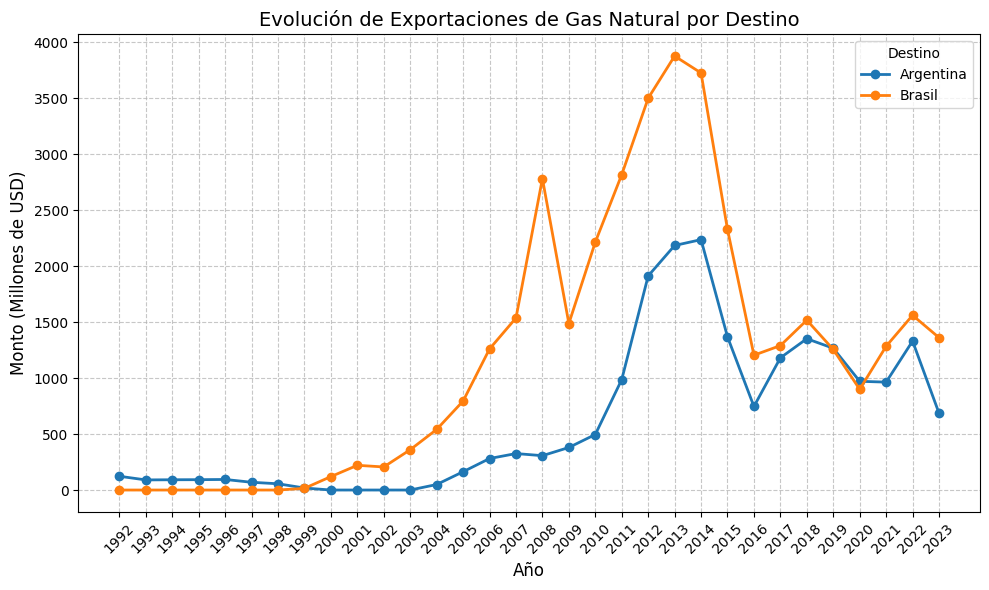

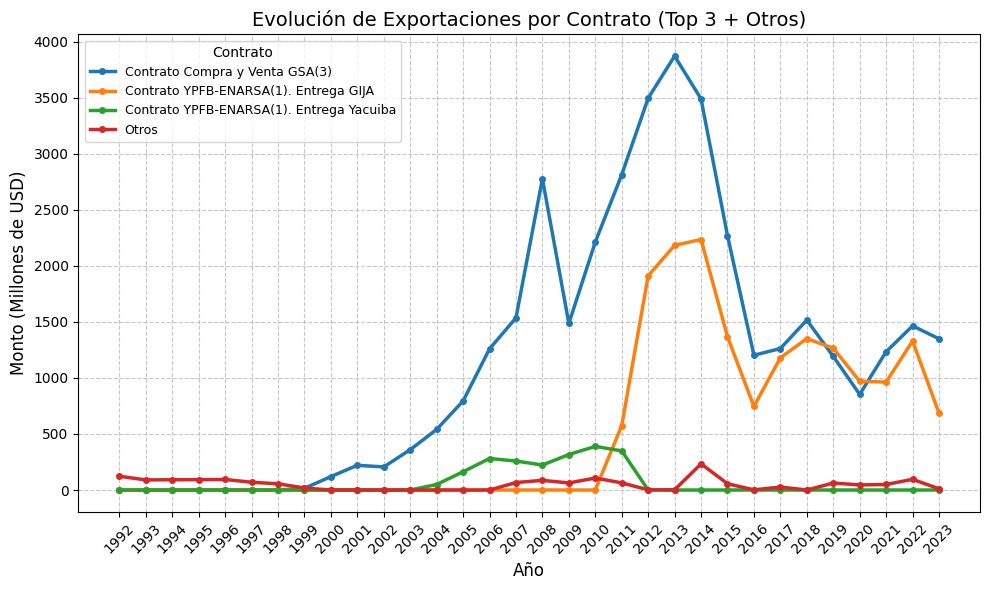

In [5]:
# 2) Evolución por Destino (Argentina vs. Brasil)
# Agrupamos por (año, destino), sumamos monto y reestructuramos con unstack()
df_destino = df.groupby(['año', 'destino'])['monto'].sum().unstack(fill_value=0)

plt.figure(figsize=(10,6))
for column in df_destino.columns:
    plt.plot(df_destino.index, df_destino[column], marker='o', linewidth=2, label=column)
plt.title("Evolución de Exportaciones de Gas Natural por Destino", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Monto (Millones de USD)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(df_destino.index, rotation=45)
plt.legend(title="Destino", fontsize=10)
plt.tight_layout()
plt.savefig(f"{output_dir}/11.2_evolucion_por_destino.png", dpi=300)
plt.show()
plt.close()

# Sumar el monto total por contrato y ordenar
contratos_totales = df.groupby('contrato')['monto'].sum().sort_values(ascending=False)

# Tomar los 3 contratos principales
top_contratos = contratos_totales.head(3).index.tolist()

# Nueva columna: si el contrato está en el top 3, se mantiene; si no, se asigna "Otros"
df['contrato_mod'] = df['contrato'].apply(lambda x: x if x in top_contratos else 'Otros')

# Agrupar por año y contrato_mod, luego reestructurar
df_line = df.groupby(['año', 'contrato_mod'])['monto'].sum().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(10,6))
df_line.plot(ax=ax, marker='o', linewidth=2.5, markersize=4)

ax.set_title("Evolución de Exportaciones por Contrato (Top 3 + Otros)", fontsize=14)
ax.set_xlabel("Año", fontsize=12)
ax.set_ylabel("Monto (Millones de USD)", fontsize=12)
ax.grid(True, linestyle='--', alpha=0.7)

ax.set_xticks(df_line.index)
ax.set_xticklabels(df_line.index, rotation=45, fontsize=10)

ax.legend(title="Contrato", fontsize=9, title_fontsize=10)
plt.tight_layout()
plt.savefig(f"{output_dir}/11.3_distribucion_por_contrato_multiline.png", dpi=300)
plt.show()
plt.close()

